<a href="https://colab.research.google.com/github/Iddrisu-Abdulai/AnalysisR/blob/main/HealthCare_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#  Import librarires
!pip install kaggle
!pip install fuzzywuzzy
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from fuzzywuzzy import fuzz, process
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving kaggle (1).json to kaggle (1) (2).json


{'kaggle (1) (2).json': b'{"username":"iddrisuabdulai","key":"d3b7ed1780e518f9a47284bbfd764061"}'}

In [3]:
# Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d mirichoi0218/insurance

# Unzip the downloaded file
!unzip insurance.zip

#Read the data into a pandas DataFrame:
import pandas as pd
df = pd.read_csv('insurance.csv')

# Print some info to confirm the data is loaded
print(df.head())
print(df.info())

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  insurance.zip
replace insurance.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: insurance.csv           
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    ------------

In [6]:
#Preprocess the data

# Convert categorical data to numbers
df = pd.get_dummies(df, drop_first=True)

# Split the data into features and target variable: Changed 'expenses' to 'charges'
X = df.drop('charges', axis=1)
y = df['charges']


# Feature Engineering: interaction term and polynomial feature
df['age_bmi_interaction'] = df['age'] * df['bmi']
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(X.columns))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
# Train the regression model : Ridge Regression
model = Ridge(alpha=1.0)  # Try different alpha values
model.fit(X_train, y_train)

Ridge()

In [10]:
# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Check if MAE is under 3500
if mae < 3500:
    print('Model passed the challenge!')
else:
    print('Model did not pass the challenge.')

Mean Absolute Error: 2735.764531590394
Model passed the challenge!


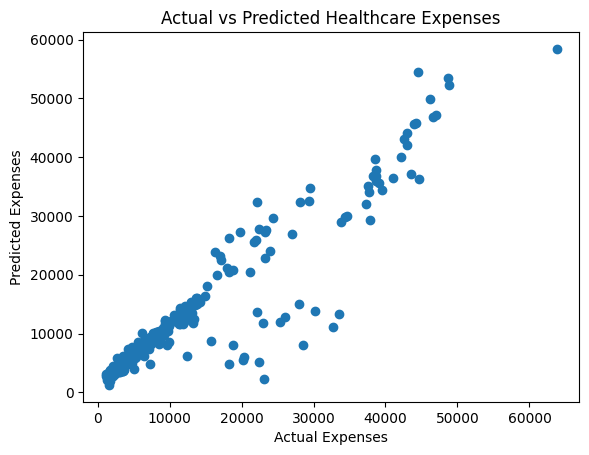

In [11]:
#Predict Expencies and Graph results

predictions = model.predict(X_test)

plt.scatter(y_test, predictions)
plt.xlabel('Actual Expenses')
plt.ylabel('Predicted Expenses')
plt.title('Actual vs Predicted Healthcare Expenses')
plt.show()